<a href="https://colab.research.google.com/github/i-r-a/toxic/blob/master/toxNNsubset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import io
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn import metrics
from keras import Sequential
from keras import layers
from nltk.corpus import stopwords
import seaborn as sns

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [60]:
train = pd.read_csv('drive/My Drive/clean_new_train.csv')

In [61]:
y = train['toxic']
x = train['comment_text']
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=300)

In [62]:
vectorizer = CountVectorizer()
vectorizer.fit(x_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [63]:
X_train = vectorizer.transform(x_train)
X_test = vectorizer.transform(x_test)

In [64]:
input_dim = X_train.shape[1]

In [65]:
model = Sequential()
model.add(layers.Dense(10,input_dim = input_dim, activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [66]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                844680    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 844,691
Trainable params: 844,691
Non-trainable params: 0
_________________________________________________________________


##Toxic vs Non-toxic

In [67]:
history = model.fit(X_train,y_train,epochs=3 ,verbose=False,validation_data=(X_test,y_test),batch_size=200)

In [68]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)

In [69]:
print(accuracy)

0.9439746141433716


In [70]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

In [71]:
predictions = model.predict(X_train)

In [72]:
pred = []
for elem in predictions:
  pred.append(int(round(elem[0])))

In [73]:
print(classification_report(y_train,pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95     18887
           1       0.93      0.96      0.94     17061

    accuracy                           0.94     35948
   macro avg       0.94      0.94      0.94     35948
weighted avg       0.94      0.94      0.94     35948



In [74]:
print(confusion_matrix(y_train,pred))

[[17624  1263]
 [  751 16310]]


In [75]:
fpr,tpr,thresh = roc_curve(y_train,pred)

In [76]:
roc_auc = auc(fpr,tpr)
print(fpr)
print(tpr)
print(len(pred))

[0.         0.06687139 1.        ]
[0.         0.95598148 1.        ]
35948


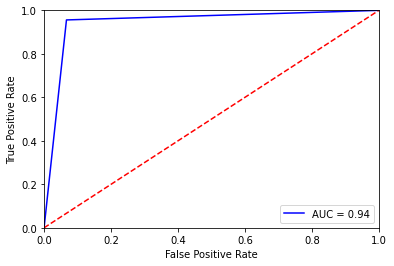

In [77]:
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [78]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)

In [79]:
print(accuracy)

0.864931046962738


In [80]:
predictions = model.predict(X_test)
pred = []
for elem in predictions:
  pred.append(int(round(elem[0])))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
fpr,tpr,thresh = roc_curve(y_test,pred)
roc_auc = auc(fpr,tpr)

              precision    recall  f1-score   support

           0       0.90      0.83      0.86      4665
           1       0.83      0.90      0.87      4323

    accuracy                           0.86      8988
   macro avg       0.87      0.87      0.86      8988
weighted avg       0.87      0.86      0.86      8988

[[3863  802]
 [ 412 3911]]


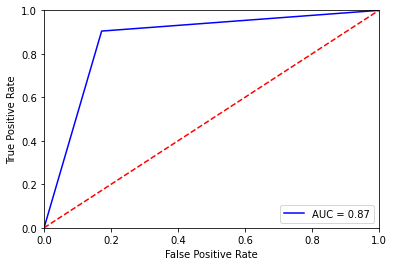

In [81]:
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


##Severe Toxic

In [82]:
y = train['severe_toxic']
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=300)
vectorizer = CountVectorizer()
vectorizer.fit(x_train)
X_train = vectorizer.transform(x_train)
X_test = vectorizer.transform(x_test)

In [83]:
historyST = model.fit(X_train,y_train,epochs=3 ,verbose=False,validation_data=(X_test,y_test),batch_size=200)

In [84]:
predictions = model.predict(X_train)
pred = []
for elem in predictions:
  pred.append(int(round(elem[0])))
print(classification_report(y_train,pred))
print(confusion_matrix(y_train,pred))
fpr,tpr,thresh = roc_curve(y_train,pred)
roc_auc = auc(fpr,tpr)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     34398
           1       0.67      0.08      0.15      1550

    accuracy                           0.96     35948
   macro avg       0.82      0.54      0.56     35948
weighted avg       0.95      0.96      0.94     35948

[[34336    62]
 [ 1423   127]]


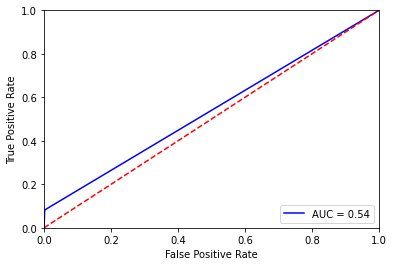

In [85]:
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [86]:
predictions = model.predict(X_test)
pred = []
for elem in predictions:
  pred.append(int(round(elem[0])))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
fpr,tpr,thresh = roc_curve(y_test,pred)
roc_auc = auc(fpr,tpr)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      8576
           1       0.49      0.07      0.12       412

    accuracy                           0.95      8988
   macro avg       0.72      0.53      0.55      8988
weighted avg       0.94      0.95      0.94      8988

[[8547   29]
 [ 384   28]]


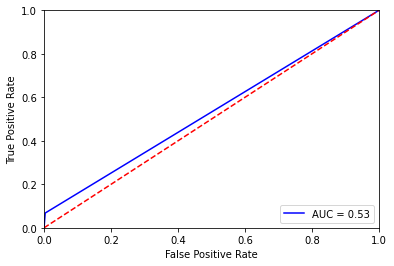

In [87]:
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [88]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Train accuracy:")
print(accuracy)
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Test accuracy:")
print(accuracy)

Train accuracy:
0.958690345287323
Test accuracy:
0.954049825668335


##Obscene

In [89]:
y = train['obscene']
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=300)
vectorizer = CountVectorizer()
vectorizer.fit(x_train)
X_train = vectorizer.transform(x_train)
X_test = vectorizer.transform(x_test)

In [90]:
historyST = model.fit(X_train,y_train,epochs=3 ,verbose=False,validation_data=(X_test,y_test),batch_size=200)

In [91]:
predictions = model.predict(X_train)
pred = []
for elem in predictions:
  pred.append(int(round(elem[0])))
print(classification_report(y_train,pred))
print(confusion_matrix(y_train,pred))
fpr,tpr,thresh = roc_curve(y_train,pred)
roc_auc = auc(fpr,tpr)

              precision    recall  f1-score   support

           0       0.83      0.98      0.90     26297
           1       0.88      0.46      0.60      9651

    accuracy                           0.84     35948
   macro avg       0.85      0.72      0.75     35948
weighted avg       0.84      0.84      0.82     35948

[[25667   630]
 [ 5231  4420]]


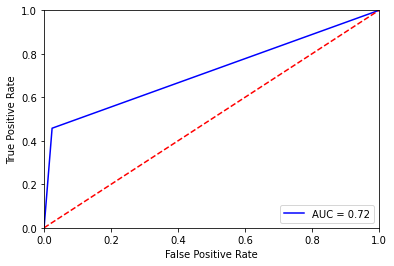

In [92]:
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [93]:
predictions = model.predict(X_test)
pred = []
for elem in predictions:
  pred.append(int(round(elem[0])))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
fpr,tpr,thresh = roc_curve(y_test,pred)
roc_auc = auc(fpr,tpr)

              precision    recall  f1-score   support

           0       0.81      0.97      0.88      6499
           1       0.84      0.42      0.56      2489

    accuracy                           0.82      8988
   macro avg       0.83      0.69      0.72      8988
weighted avg       0.82      0.82      0.79      8988

[[6301  198]
 [1454 1035]]


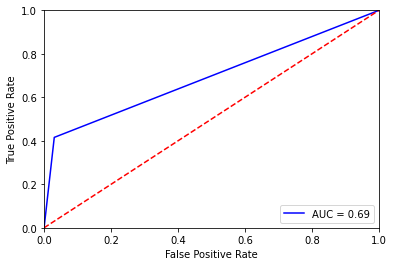

In [94]:
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [95]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Train accuracy:")
print(accuracy)
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Test accuracy:")
print(accuracy)

Train accuracy:
0.8369589447975159
Test accuracy:
0.8161993622779846


##Threat

In [96]:
y = train['threat']
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=300)
vectorizer = CountVectorizer()
vectorizer.fit(x_train)
X_train = vectorizer.transform(x_train)
X_test = vectorizer.transform(x_test)

In [97]:
historyST = model.fit(X_train,y_train,epochs=3 ,verbose=False,validation_data=(X_test,y_test),batch_size=200)

In [98]:
predictions = model.predict(X_train)
pred = []
for elem in predictions:
  pred.append(int(round(elem[0])))
print(classification_report(y_train,pred))
print(confusion_matrix(y_train,pred))
fpr,tpr,thresh = roc_curve(y_train,pred)
roc_auc = auc(fpr,tpr)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     35395
           1       0.71      0.01      0.02       553

    accuracy                           0.98     35948
   macro avg       0.85      0.50      0.51     35948
weighted avg       0.98      0.98      0.98     35948

[[35393     2]
 [  548     5]]


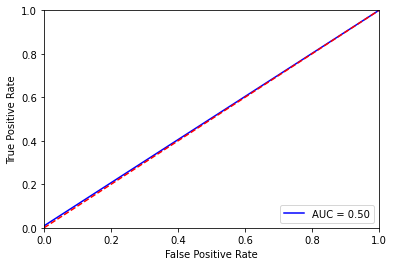

In [99]:
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [100]:
predictions = model.predict(X_test)
pred = []
for elem in predictions:
  pred.append(int(round(elem[0])))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
fpr,tpr,thresh = roc_curve(y_test,pred)
roc_auc = auc(fpr,tpr)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8852
           1       0.11      0.01      0.01       136

    accuracy                           0.98      8988
   macro avg       0.55      0.50      0.50      8988
weighted avg       0.97      0.98      0.98      8988

[[8844    8]
 [ 135    1]]


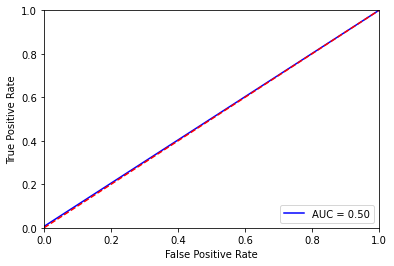

In [101]:
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [102]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Train accuracy:")
print(accuracy)
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Test accuracy:")
print(accuracy)

Train accuracy:
0.9847001433372498
Test accuracy:
0.9840899109840393


##Insult

In [103]:
y = train['insult']
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=300)
vectorizer = CountVectorizer()
vectorizer.fit(x_train)
X_train = vectorizer.transform(x_train)
X_test = vectorizer.transform(x_test)

In [104]:
historyST = model.fit(X_train,y_train,epochs=3 ,verbose=False,validation_data=(X_test,y_test),batch_size=200)

In [105]:
predictions = model.predict(X_train)
pred = []
for elem in predictions:
  pred.append(int(round(elem[0])))
print(classification_report(y_train,pred))
print(confusion_matrix(y_train,pred))
fpr,tpr,thresh = roc_curve(y_train,pred)
roc_auc = auc(fpr,tpr)

              precision    recall  f1-score   support

           0       0.85      0.98      0.91     26954
           1       0.88      0.47      0.61      8994

    accuracy                           0.85     35948
   macro avg       0.86      0.72      0.76     35948
weighted avg       0.85      0.85      0.83     35948

[[26366   588]
 [ 4795  4199]]


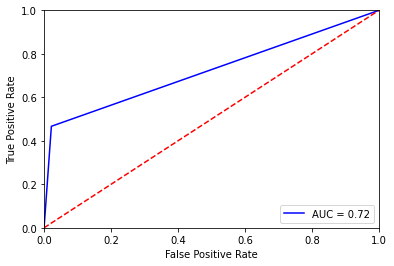

In [106]:
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [107]:
predictions = model.predict(X_test)
pred = []
for elem in predictions:
  pred.append(int(round(elem[0])))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
fpr,tpr,thresh = roc_curve(y_test,pred)
roc_auc = auc(fpr,tpr)

              precision    recall  f1-score   support

           0       0.82      0.96      0.88      6678
           1       0.78      0.38      0.51      2310

    accuracy                           0.81      8988
   macro avg       0.80      0.67      0.69      8988
weighted avg       0.81      0.81      0.79      8988

[[6427  251]
 [1443  867]]


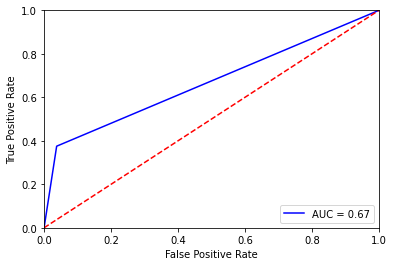

In [108]:
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [109]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Train accuracy:")
print(accuracy)
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Test accuracy:")
print(accuracy)

Train accuracy:
0.8502559065818787
Test accuracy:
0.8115264773368835


##Identity Hate

In [110]:
y = train['identity_hate']
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=300)
vectorizer = CountVectorizer()
vectorizer.fit(x_train)
X_train = vectorizer.transform(x_train)
X_test = vectorizer.transform(x_test)

In [111]:
historyST = model.fit(X_train,y_train,epochs=3 ,verbose=False,validation_data=(X_test,y_test),batch_size=200)

In [112]:
predictions = model.predict(X_train)
pred = []
for elem in predictions:
  pred.append(int(round(elem[0])))
print(classification_report(y_train,pred))
print(confusion_matrix(y_train,pred))
fpr,tpr,thresh = roc_curve(y_train,pred)
roc_auc = auc(fpr,tpr)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     34281
           1       0.92      0.07      0.14      1667

    accuracy                           0.96     35948
   macro avg       0.94      0.54      0.56     35948
weighted avg       0.96      0.96      0.94     35948

[[34270    11]
 [ 1544   123]]


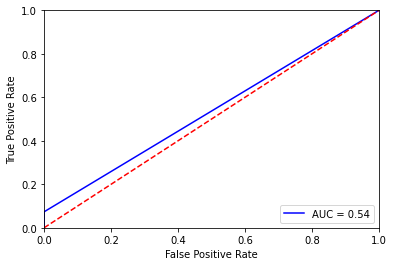

In [113]:
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [114]:
predictions = model.predict(X_test)
pred = []
for elem in predictions:
  pred.append(int(round(elem[0])))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
fpr,tpr,thresh = roc_curve(y_test,pred)
roc_auc = auc(fpr,tpr)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      8538
           1       0.51      0.04      0.08       450

    accuracy                           0.95      8988
   macro avg       0.73      0.52      0.53      8988
weighted avg       0.93      0.95      0.93      8988

[[8520   18]
 [ 431   19]]


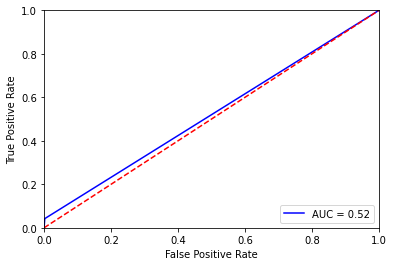

In [115]:
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [116]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Train accuracy:")
print(accuracy)
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Test accuracy:")
print(accuracy)

Train accuracy:
0.956743061542511
Test accuracy:
0.9500445127487183
